# Descriptive statistics - Canopy closure (CC) Maps

**Objective:** This notebook provides descriptive statistics of leaf area index (LAI) maps to understand the distribution and characteristics of LAI values. 

**Data:** CC maps were generated using PROSAIL generated LAI maps.

**Methods:** This notebook will explore the following aspects of the LAI maps:

* Distribution of LAI values
* Summary statistics (e.g., mean, median, standard deviation)

**Notebook Structure:** This notebook is organized into the following sections:

1. Data Import and Preparation
2. Descriptive Statistics

### 1. Set up environment

In [44]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import numpy as np
import geopandas as gpd
from rasterio.crs import CRS
import rioxarray as rxr
import rasterio as rio
import pandas as pd
from shapely.geometry import Point
import datetime as dt

In [45]:
os.chdir(r'E:\proj_cercospoRa')
current_date = dt.date.today()
out = r"E:\proj_cercospoRa\04_output\03_data_analysis"

### 2. Import raster and vector data

In [46]:
treated_ino = r"03_proc_data\Inoculation_circle\20250504_treated_ino.gpkg"
untreated_ino = r"03_proc_data\Inoculation_circle\20250504_untreated_ino.gpkg"

treated_roi = r"03_proc_data\Inoculation_circle\20250504_treated_roi_diff.gpkg"
untreated_roi = r"03_proc_data\Inoculation_circle\20250504_untreated_roi_diff.gpkg"

# Load the raster file
cc_uas = r"03_proc_data\canopy_maps\UAV_CC.tif"
cc_s2 = r"03_proc_data\canopy_maps\S2_CC.tif"
cc_s2s = r"03_proc_data\superesolution\results_superesolution\Canopy_closure\S2_SR_CC.tif"

# Load the polygon layers
treated_ino = gpd.read_file(treated_ino)
untreated_ino = gpd.read_file(untreated_ino)

treated_roi = gpd.read_file(treated_roi)
untreated_roi = gpd.read_file(untreated_roi)

cc_uas = rxr.open_rasterio(cc_uas)
cc_s2 = rxr.open_rasterio(cc_s2)
cc_s2s = rxr.open_rasterio(cc_s2s)

print(f"⚠️ UAS canopy closure raster CRS: {cc_uas.rio.crs}")
print(f"⚠️ S2 canopy closure raster CRS: {cc_s2.rio.crs}")
print(f"⚠️ S2S canopy closure raster CRS: {cc_s2s.rio.crs}")

⚠️ UAS canopy closure raster CRS: EPSG:4326
⚠️ S2 canopy closure raster CRS: EPSG:32632
⚠️ S2S canopy closure raster CRS: EPSG:32632


### 3. Reproject CRS

In [47]:
cc_uas_rp = cc_uas.rio.reproject("EPSG:32632")

print(f"⚠️ UAS reprojected raster CRS: {cc_uas_rp.rio.crs}")

⚠️ UAS reprojected raster CRS: EPSG:32632


In [48]:
treated_ino = treated_ino.to_crs(32632)
untreated_ino = untreated_ino.to_crs(32632)

treated_roi = treated_roi.to_crs(32632)
untreated_roi = untreated_roi.to_crs(32632)

print(f"⚠️ Treated inoculation area CRS: {treated_ino.crs}")
print(f"⚠️ Unreated inoculation area CRS: {untreated_ino.crs}")

print(f"⚠️ Treated ROI CRS: {treated_roi.crs}")
print(f"⚠️ Untreated ROI CRS: {untreated_roi.crs}")

⚠️ Treated inoculation area CRS: EPSG:32632
⚠️ Unreated inoculation area CRS: EPSG:32632
⚠️ Treated ROI CRS: EPSG:32632
⚠️ Untreated ROI CRS: EPSG:32632


### 4. Handle no data values

In [49]:
print(f"⚠️ UAS no data value is: {cc_uas_rp.rio.nodata}")
print(f"⚠️ S2 no data value is: {cc_s2.rio.nodata}")
print(f"⚠️ S2S no data value is: {cc_s2s.rio.nodata}")

⚠️ UAS no data value is: 4294967295
⚠️ S2 no data value is: 4294967295
⚠️ S2S no data value is: nan


In [50]:
cc_uas_rp = cc_uas_rp.where(cc_uas_rp <= 2000)
cc_uas_rp.rio.write_nodata(np.nan, inplace=True)

cc_s2 = cc_s2.where(cc_s2 <= 2000)
cc_s2.rio.write_nodata(np.nan, inplace=True)

print(f"⚠️ UAS no data value is: {cc_uas_rp.rio.nodata}")
print(f"⚠️ S2 no data value is: {cc_s2.rio.nodata}")

⚠️ UAS no data value is: nan
⚠️ S2 no data value is: nan


### 4. Verify location of vector layers

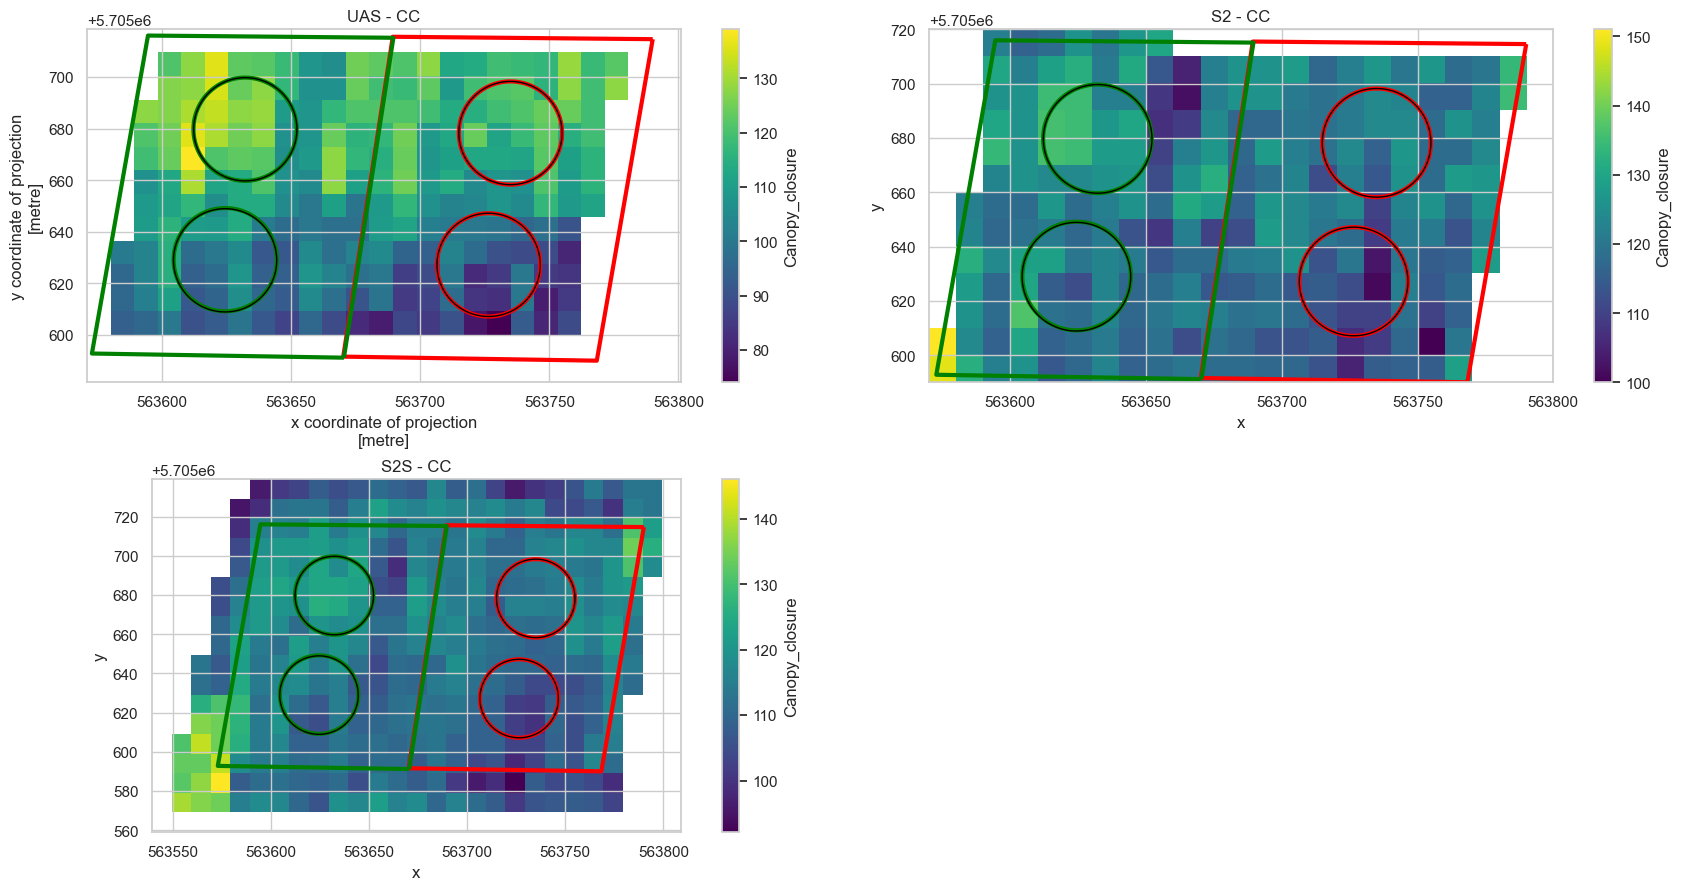

In [51]:
# Create a figure with a 2x3 subplot grid
fig = plt.figure(figsize=(18, 9))

# Create a gridspec with 2 columns and 3 rows
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1])

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])


# UAS - CC
cc_uas_rp.isel(band=0).plot.imshow(ax=ax1, cmap="viridis")
treated_roi.boundary.plot(ax=ax1, edgecolor='red', linewidth=3)
untreated_roi.boundary.plot(ax=ax1, edgecolor='green', linewidth=3)

treated_ino.boundary.plot(ax=ax1, edgecolor='black', linewidth=1)
untreated_ino.boundary.plot(ax=ax1, edgecolor='black', linewidth=1)

ax1.set_title("UAS - CC")

# S2 - CC
cc_s2.isel(band=0).plot.imshow(ax=ax2, cmap="viridis")
treated_roi.boundary.plot(ax=ax2, edgecolor='red', linewidth=3)
untreated_roi.boundary.plot(ax=ax2, edgecolor='green', linewidth=3)

treated_ino.boundary.plot(ax=ax2, edgecolor='black', linewidth=1)
untreated_ino.boundary.plot(ax=ax2, edgecolor='black', linewidth=1)

ax2.set_title("S2 - CC")

# S2S - CC
cc_s2s.isel(band=0).plot.imshow(ax=ax3, cmap="viridis")
treated_roi.boundary.plot(ax=ax3, edgecolor='red', linewidth=3)
untreated_roi.boundary.plot(ax=ax3, edgecolor='green', linewidth=3)

treated_ino.boundary.plot(ax=ax3, edgecolor='black', linewidth=1)
untreated_ino.boundary.plot(ax=ax3, edgecolor='black', linewidth=1)

ax3.set_title("S2S - CC")


# Layout so plots do not overlap
fig.tight_layout()
plt.savefig(os.path.join(out, f"{current_date}_plot_vectorcheck_cc.png"), dpi=600, bbox_inches='tight')
plt.show()

### 5. Extract UAS-derived CC values

In [52]:
def extract_raster_data(uas_1_rp, treated_roi, untreated_roi, treated_ino, untreated_ino, df_name="df_", value_column="values"):
    extractions = [
        (treated_roi,    "treated",   "non-inoculated"),
        (untreated_roi,  "untreated", "non-inoculated"),
        (treated_ino,    "treated",   "inoculated"),
        (untreated_ino,  "untreated", "inoculated")
    ]

    dfs = []

    for poly, treatment, region in extractions:
        clipped = uas_1_rp.rio.clip(poly.geometry, poly.crs, drop=True).isel(band=0)
        values = clipped.values.flatten()
        mask = ~np.isnan(values)
        values = values[mask]

        y_coords, x_coords = np.meshgrid(clipped['y'].values, clipped['x'].values, indexing='ij')
        x_flat = x_coords.flatten()[mask]
        y_flat = y_coords.flatten()[mask]

        df = pd.DataFrame({
            "x": x_flat,
            "y": y_flat,
            value_column: values,
            "treatment": treatment,
            "area": region,
            "source": df_name
        })

        dfs.append(df)

    df = pd.concat(dfs, ignore_index=True)
    return df

In [53]:
df_uas_cc = extract_raster_data(cc_uas_rp, treated_roi, untreated_roi, treated_ino, untreated_ino, df_name="uas", value_column="cc")
df_uas_cc

,x,y,cc,treatment,area,source
0,563693.870140,5.705705e+06,121.0,treated,non-inoculated,uas
1,563702.986673,5.705705e+06,128.0,treated,non-inoculated,uas
2,563712.103206,5.705705e+06,113.0,treated,non-inoculated,uas
3,563721.219739,5.705705e+06,114.0,treated,non-inoculated,uas
4,563730.336273,5.705705e+06,119.0,treated,non-inoculated,uas
...,...,...,...,...,...,...
235,563630.054407,5.705623e+06,108.0,untreated,inoculated,uas
236,563639.170940,5.705623e+06,94.0,untreated,inoculated,uas
237,563611.821340,5.705614e+06,92.0,untreated,inoculated,uas
238,563620.937874,5.705614e+06,95.0,untreated,inoculated,uas


### 5. Extract S2-derived CC values

In [54]:
df_s2_cc = extract_raster_data(cc_s2, treated_roi, untreated_roi, treated_ino, untreated_ino, df_name="s2", value_column="cc")
df_s2_cc

,x,y,cc,treatment,area,source
0,563695.0,5705705.0,126.0,treated,non-inoculated,s2
1,563705.0,5705705.0,128.0,treated,non-inoculated,s2
2,563715.0,5705705.0,117.0,treated,non-inoculated,s2
3,563725.0,5705705.0,122.0,treated,non-inoculated,s2
4,563735.0,5705705.0,127.0,treated,non-inoculated,s2
...,...,...,...,...,...,...
237,563625.0,5705625.0,112.0,untreated,inoculated,s2
238,563635.0,5705625.0,123.0,untreated,inoculated,s2
239,563615.0,5705615.0,119.0,untreated,inoculated,s2
240,563625.0,5705615.0,118.0,untreated,inoculated,s2


### 5. Extract S2S-derived CC values

In [55]:
df_s2s_cc = extract_raster_data(cc_s2s, treated_roi, untreated_roi, treated_ino, untreated_ino, df_name="s2s", value_column="cc")
df_s2s_cc

,x,y,cc,treatment,area,source
0,563694.0,5705714.0,113.083336,treated,non-inoculated,s2s
1,563704.0,5705714.0,118.083336,treated,non-inoculated,s2s
2,563714.0,5705714.0,114.083336,treated,non-inoculated,s2s
3,563724.0,5705714.0,109.083336,treated,non-inoculated,s2s
4,563734.0,5705714.0,115.083336,treated,non-inoculated,s2s
...,...,...,...,...,...,...
250,563624.0,5705624.0,107.083336,untreated,inoculated,s2s
251,563634.0,5705624.0,115.083336,untreated,inoculated,s2s
252,563614.0,5705614.0,107.083336,untreated,inoculated,s2s
253,563624.0,5705614.0,105.083336,untreated,inoculated,s2s


### 8. Concatenate and clean dataframes

In [56]:
# Concatenate the individual DataFrames (df_s2_prediction, df_uav_prediction, etc.)
df_all = pd.concat([df_uas_cc, df_s2_cc, df_s2s_cc], ignore_index=True)

df_all.to_csv(os.path.join(out, f"{current_date}_fulldf_cc_cercospoRa.csv"), index=False)

df_untreated = df_all[df_all["treatment"] == "untreated"]

# Show the resulting DataFrame
df_untreated

,x,y,cc,treatment,area,source
85,563602.704807,5.705705e+06,121.000000,untreated,non-inoculated,uas
86,563611.821340,5.705705e+06,128.000000,untreated,non-inoculated,uas
87,563620.937874,5.705705e+06,136.000000,untreated,non-inoculated,uas
88,563630.054407,5.705705e+06,123.000000,untreated,non-inoculated,uas
89,563639.170940,5.705705e+06,122.000000,untreated,non-inoculated,uas
...,...,...,...,...,...,...
732,563624.000000,5.705624e+06,107.083336,untreated,inoculated,s2s
733,563634.000000,5.705624e+06,115.083336,untreated,inoculated,s2s
734,563614.000000,5.705614e+06,107.083336,untreated,inoculated,s2s
735,563624.000000,5.705614e+06,105.083336,untreated,inoculated,s2s


### 9. Summarize CC (untreated) data

In [57]:
# Group and summarize
summary = df_untreated.groupby(['area', 'source'])['cc'].describe().round(2)

# Optional: reset index for flat table display
summary = summary.reset_index()

# Save the summary to a CSV file
summary.to_csv(os.path.join(out, f"{current_date}_summary_desc_stats_cc_cercospoRa.csv"), index=False)

# Display the summary (optional)
summary

,area,source,count,mean,std,min,25%,50%,75%,max
0,inoculated,s2,27.0,125.26,6.62,112.00,121.00,124.00,129.50,136.00
1,inoculated,s2s,26.0,117.97,5.83,105.08,114.33,119.08,122.58,126.08
2,inoculated,uas,30.0,112.13,13.94,92.00,100.25,109.50,124.75,135.00
3,non-inoculated,s2,96.0,121.95,8.08,102.00,117.00,122.00,126.00,151.00
4,non-inoculated,s2s,99.0,115.03,6.21,99.08,111.08,114.08,119.08,141.08
5,non-inoculated,uas,93.0,110.52,12.43,87.00,100.00,109.00,121.00,139.00


### 10. Verify position of extracted coordinates

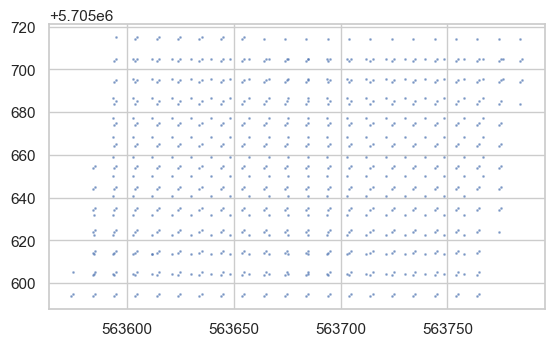

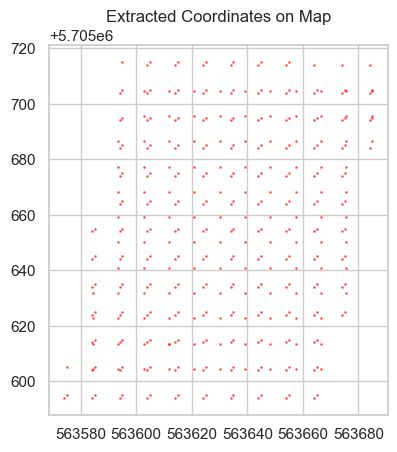

In [58]:
# Create geometry column from x and y
geometry = [Point(xy) for xy in zip(df_all["x"], df_all["y"])]
geometry_un = [Point(xy) for xy in zip(df_untreated["x"], df_untreated["y"])]
gdf = gpd.GeoDataFrame(df_all, geometry=geometry, crs="EPSG:32633")  # Replace with your CRS
gdf_un = gpd.GeoDataFrame(df_untreated, geometry=geometry_un, crs="EPSG:32633")  # Replace with your CRS
# Plot
gdf.plot(markersize=1, alpha=0.5)
gdf_un.plot(markersize=1, alpha=0.5, color="red")
plt.title("Extracted Coordinates on Map")
plt.show()

### 11. Visualize untreated LAI data

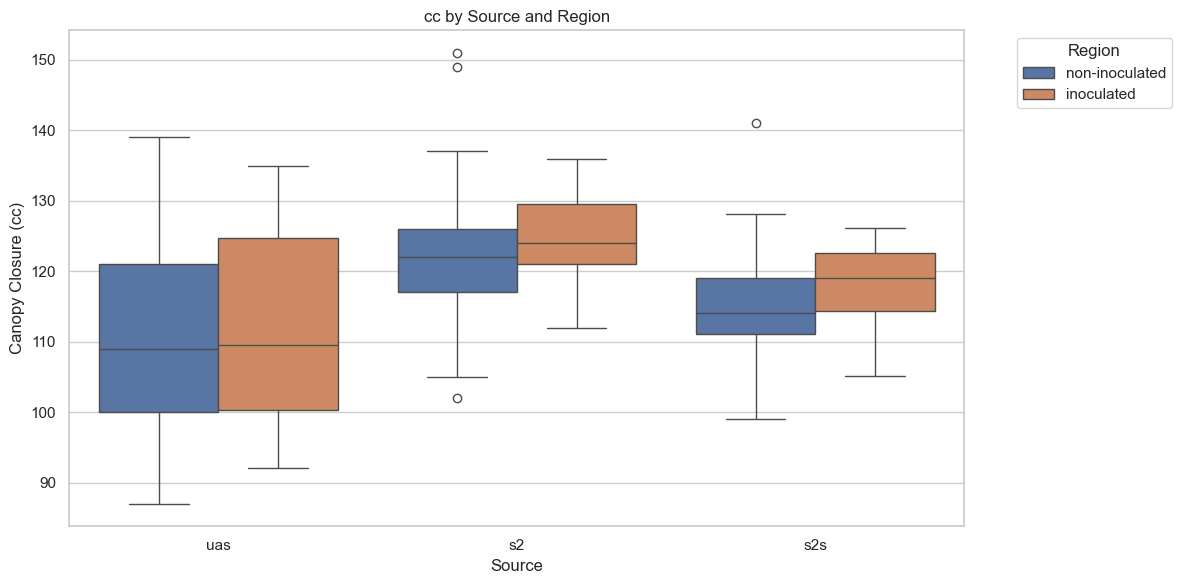

In [59]:
# Set plot style
sns.set(style="whitegrid")

# Create a boxplot of LAI by source and region
plt.figure(figsize=(12, 6))
sns.boxplot(x="source", y="cc", hue="area", data=df_untreated)

# Add titles and labels
plt.title("cc by Source and Region")
plt.xlabel("Source")
plt.ylabel("Canopy Closure (cc)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [60]:
# Inoculated Area

median_uas_ino = summary.loc[
    (summary['area'] == 'inoculated') & (summary['source'] == 'uas'), '50%'
].values[0]

median_s2_ino = summary.loc[
    (summary['area'] == 'inoculated') & (summary['source'] == 's2'), '50%'
].values[0]

median_s2s_ino = summary.loc[
    (summary['area'] == 'inoculated') & (summary['source'] == 's2s'), '50%'
].values[0]

# Non-inoculated Area

median_uas_nino = summary.loc[
    (summary['area'] == 'non-inoculated') & (summary['source'] == 'uas'), '50%'
].values[0]

median_s2_nino = summary.loc[
    (summary['area'] == 'non-inoculated') & (summary['source'] == 's2'), '50%'
].values[0]

median_s2s_nino = summary.loc[
    (summary['area'] == 'non-inoculated') & (summary['source'] == 's2s'), '50%'
].values[0]

print(median_uas_ino, median_s2_ino, median_s2s_ino, median_uas_nino, median_s2_nino, median_s2s_nino)

109.5 124.0 119.08 109.0 122.0 114.08


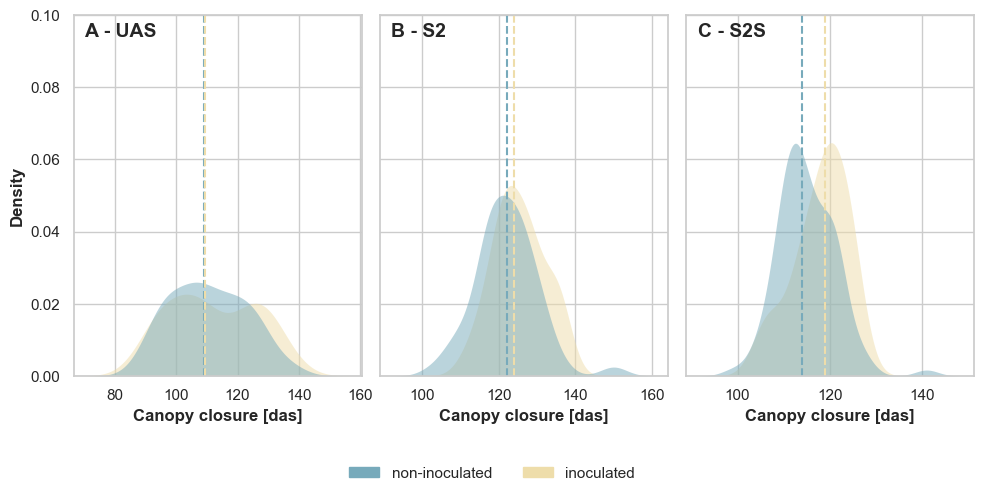

In [61]:
sns.set_style("whitegrid")

df_uas = df_untreated[df_untreated["source"] == "uas"]
df_s2 = df_untreated[df_untreated["source"] == "s2"]
df_s2s = df_untreated[df_untreated["source"] == "s2s"]

# Get unique regions
area = df_uas["area"].unique()
# Generate palette (same as your KDE)
palette = sns.color_palette("blend:#7AB,#EDA", n_colors=len(area))
# Map region names to colors
area_colors = dict(zip(area, palette))

# Create subplots
fig, axs = plt.subplots(ncols=3, figsize=(10, 5), sharey=True)

# PLOT UAS

sns.kdeplot(
        data=df_uas, x="cc", hue="area",
        fill=True, common_norm=False, palette=area_colors,
        alpha=0.5, linewidth=0, ax=axs[0], legend=False
    )

axs[0].set_ylim(0, 0.1)

# Add vertical lines to axs[0]
axs[0].axvline(median_uas_nino, ymin=0, ymax=1, color=area_colors[area[0]], linestyle='--') # non-inoculated
axs[0].axvline(median_uas_ino, ymin=0, ymax=1, color=area_colors[area[1]], linestyle='--') # inoculated

# Add letter label to upper-left of axs[0]
axs[0].text(
    0.04, 0.98, 'A - UAS', transform=axs[0].transAxes,
    fontsize=14, fontweight='bold', va='top', ha='left'
)

axs[0].set_ylabel("Density", fontsize=12, fontweight='bold')
axs[0].set_xlabel("Canopy closure [das]", fontsize=12, fontweight='bold')


# PLOT S2

sns.kdeplot(
        data=df_s2, x="cc", hue="area",
        fill=True, common_norm=False, palette=area_colors,
        alpha=0.5, linewidth=0, ax=axs[1], legend=False
    )

axs[1].set_ylim(0, 0.1)

# Add vertical lines to axs[0]
axs[1].axvline(median_s2_nino, ymin=0, ymax=1, color=area_colors[area[0]], linestyle='--') # non-inoculated
axs[1].axvline(median_s2_ino, ymin=0, ymax=1, color=area_colors[area[1]], linestyle='--') # inoculated

# Add letter label to upper-left of axs[0]
axs[1].text(
    0.04, 0.98, 'B - S2', transform=axs[1].transAxes,
    fontsize=14, fontweight='bold', va='top', ha='left'
)

axs[1].set_ylabel("Density", fontsize=12, fontweight='bold')
axs[1].set_xlabel("Canopy closure [das]", fontsize=12, fontweight='bold')


# PLOT S2S

sns.kdeplot(
        data=df_s2s, x="cc", hue="area",
        fill=True, common_norm=False, palette=area_colors,
        alpha=0.5, linewidth=0, ax=axs[2], legend=False
    )

axs[2].set_ylim(0, 0.1)

# Add vertical lines to axs[0]
axs[2].axvline(median_s2s_nino, ymin=0, ymax=1, color=area_colors[area[0]], linestyle='--') # non-inoculated
axs[2].axvline(median_s2s_ino, ymin=0, ymax=1, color=area_colors[area[1]], linestyle='--') # inoculated

# Add letter label to upper-left of axs[0]
axs[2].text(
    0.04, 0.98, 'C - S2S', transform=axs[2].transAxes,
    fontsize=14, fontweight='bold', va='top', ha='left'
)

axs[2].set_ylabel("Density", fontsize=12, fontweight='bold')
axs[2].set_xlabel("Canopy closure [das]", fontsize=12, fontweight='bold')


# Manually create legend handles
handles = [mpatches.Patch(color=color, label=area) for area, color in area_colors.items()]

# Add one shared legend below both subplots
fig.legend(handles=handles, loc='lower center', ncol=len(area), frameon=False)

# Adjust layout to make space for legend
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leave room at bottom
plt.savefig(os.path.join(out, f"{current_date}_plot_kde_cc_cercospoRa.png"), dpi=600, bbox_inches='tight')

plt.show()

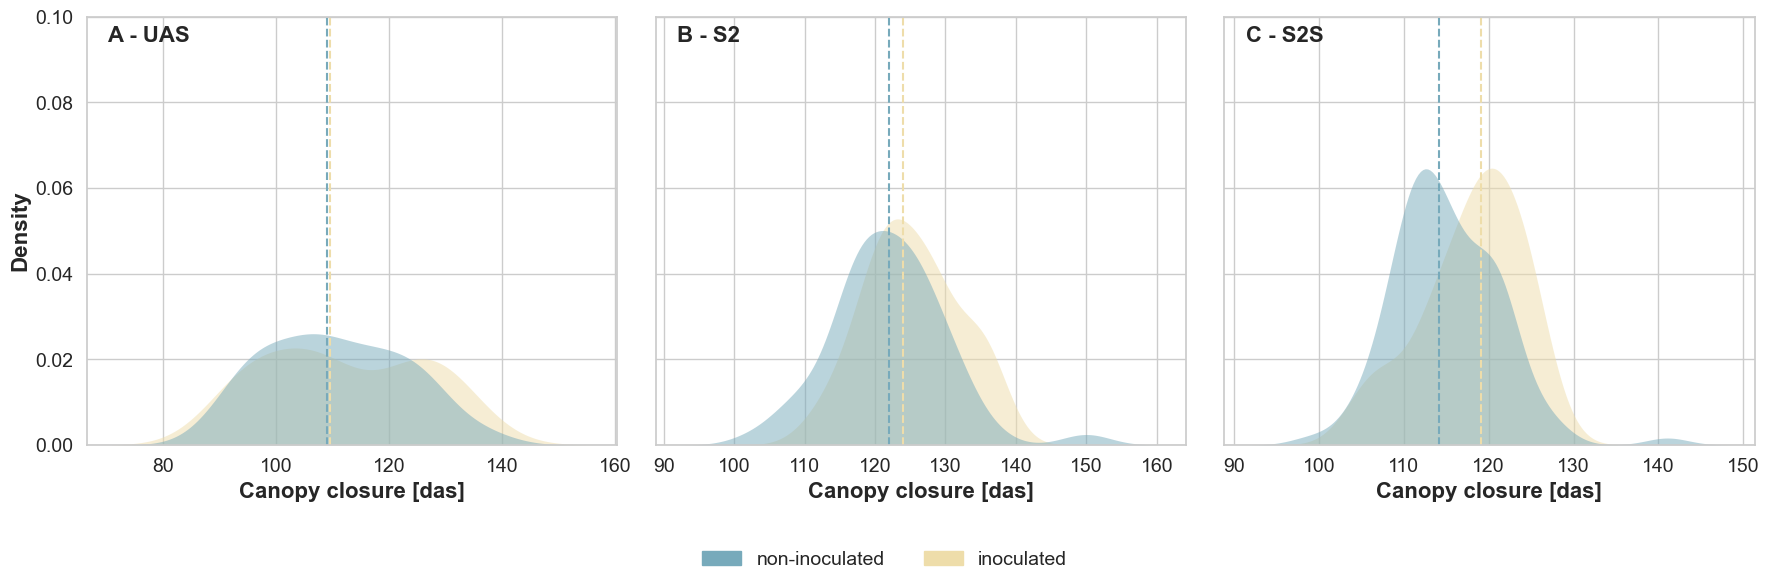

In [62]:
from matplotlib import rcParams

# Set publication-style fonts and seaborn theme
sns.set_style("whitegrid")
rcParams.update({
    'font.size': 16,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14
})

# Prepare data
df_uas = df_untreated[df_untreated["source"] == "uas"]
df_s2 = df_untreated[df_untreated["source"] == "s2"]
df_s2s = df_untreated[df_untreated["source"] == "s2s"]

# Color palette by area
area = df_uas["area"].unique()
palette = sns.color_palette("blend:#7AB,#EDA", n_colors=len(area))
area_colors = dict(zip(area, palette))

# Set up subplots
fig, axs = plt.subplots(ncols=3, figsize=(18, 6), sharey=True)

# Define common plotting function
def plot_kde(ax, data, median_nino, median_ino, label):
    sns.kdeplot(
        data=data, x="cc", hue="area", fill=True, common_norm=False,
        palette=area_colors, alpha=0.5, linewidth=0, ax=ax, legend=False
    )
    ax.set_ylim(0, 0.1)
    ax.axvline(median_nino, color=area_colors[area[0]], linestyle='--')
    ax.axvline(median_ino, color=area_colors[area[1]], linestyle='--')
    ax.text(0.04, 0.98, label, transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='left')
    ax.set_ylabel("Density", fontsize=16, fontweight='bold')
    ax.set_xlabel("Canopy closure [das]", fontsize=16, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=14)

# Apply to each subplot
plot_kde(axs[0], df_uas, median_uas_nino, median_uas_ino, 'A - UAS')
plot_kde(axs[1], df_s2, median_s2_nino, median_s2_ino, 'B - S2')
plot_kde(axs[2], df_s2s, median_s2s_nino, median_s2s_ino, 'C - S2S')

# Add legend
handles = [mpatches.Patch(color=color, label=label) for label, color in area_colors.items()]
fig.legend(handles=handles, loc='lower center', ncol=len(area), frameon=False, fontsize=14)

# Final layout adjustments
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.savefig(os.path.join(out, f"{current_date}_plot_kde_cc_cercospoRa.png"), dpi=600, bbox_inches='tight')
plt.show()


In [63]:
print("Success")

Success
